### This notebook contains the code for the Course Project on :

## Model Optimization on the method presented in the science article:
## “A Simple and Effective Method for Predicting Travel Times on Freeways”
## Author: Le Xu

In [1]:
## Import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
%matplotlib inline
import statsmodels.formula.api as smf

## Data Preprocessing
1. Load the data from 2 weeks from May 2013


In [103]:
list_of_files = glob.glob('*.txt') # list of files have all .txt type
list_of_files = list_of_files
list_of_files

['d04_text_station_5min_2013_05_01.txt',
 'd04_text_station_5min_2013_05_02.txt',
 'd04_text_station_5min_2013_05_03.txt',
 'd04_text_station_5min_2013_05_04.txt',
 'd04_text_station_5min_2013_05_05.txt',
 'd04_text_station_5min_2013_05_06.txt',
 'd04_text_station_5min_2013_05_07.txt',
 'd04_text_station_5min_2013_05_08.txt',
 'd04_text_station_5min_2013_05_09.txt',
 'd04_text_station_5min_2013_05_10.txt',
 'd04_text_station_5min_2013_05_11.txt',
 'd04_text_station_5min_2013_05_12.txt',
 'd04_text_station_5min_2013_05_13.txt']

In [104]:
lis_name = []
for i in list_of_files:
     lis_name.append(i[-14:-4])

2. Using a for-loop to merge the data and calculate the historical mean travel time

(the time lag will be 60 mins)

## the giant chunk of codes below is used to 
## 1. load 13 days data into dataframe, choose the columns that we need for the research.
## 2. pivot the table and choose the hours that we need to study on from 5 am to 22 pm
## 3. since the time interval is 5 mins, the code also extract the hours and 30 minutes as intervals.
## 4. the code also merged the sensors' distances and calculated travel time for each sensors, and then sum it up for total sensors.
## 5. The code is able to return travel time for each hour or each half an hour

In [577]:
df_station = pd.read_csv("speed.csv")
df_station.columns = ['Station', 'PM']
lis = []
list1 = []
distance_list = []
distance = 0
for i, name in enumerate(list_of_files):
    # read each file
    globals()["df_{}".format(i+1)] = pd.read_table(name, sep=',', header= None) 
    globals()["df_{}".format(i+1)] = globals()["df_{}".format(i+1)].iloc[:,(0,1,9,10,11)]
    
    globals()["df_{}".format(i+1)].columns = ['Timestamp','Station','Total_flow','Avg_occupancy', 'Ave_speed']
                                              
    globals()["pivot_df_{}".format(i+1)] = \
    pd.pivot_table(globals()["df_{}".format(i+1)], \
    values='Ave_speed', columns=['Station'], index = ['Timestamp'])
                                              
    # choose 
    globals()["currenthour_{}".format(i+1)] = globals()["pivot_df_{}".format(i+1)].iloc[6::6] ##### the hours
                                              
    for each_hour in range(9,47): 
    
        # from 5 O'clock to 22 O'CLOCK
        globals()["allhour_{}".format(each_hour+1)] = pd.DataFrame(
                                               globals()["currenthour_{}".format(i+1)].iloc[each_hour])
    
        globals()["allhour_{}".format(each_hour+1)].reset_index(inplace = True)
        
        globals()["allhour_{}".format(each_hour+1)] = pd.merge(
                                             globals()["allhour_{}".format(each_hour+1)], 
                                             df_station,how = 'inner', on = 'Station')
        globals()["allhour_{}".format(each_hour+1)].dropna(inplace = True)
        globals()["allhour_{}".format(each_hour+1)].sort_values(by ='PM', inplace=True)
        globals()["allhour_{}".format(each_hour+1)].reset_index(drop=True,inplace=True)
        current_travel_time = 0
        
        for j in range(len(globals()["allhour_{}".format(each_hour+1)])):
            
            if j >= 1:
                distance = globals()["allhour_{}".format(each_hour+1)].PM[j] -\
                           globals()["allhour_{}".format(each_hour+1)].PM[j-1]
                distance_list.append(distance)
                current_travel_time += 2*distance/(globals()["allhour_{}".format(each_hour+1)].iloc[:,1][j]+\
                                                  globals()["allhour_{}".format(each_hour+1)].iloc[:,1][j-1])

         
        list1.append(current_travel_time*60)



 

In [578]:
array_1 = np.array(list1)
array_1 = array_1.reshape(38,13)
current_half = pd.DataFrame(array_1, columns=lis_name)


## write the file to csv for future analysis

In [8]:
current_half.to_csv('half_hour.csv')

## Analysis Part 

In [33]:
df = pd.read_csv("mean_speed_term_project.csv")
#df_half = pd.read_csv('half_hour.csv')
df_new = df.iloc[:,1:]
df_half = pd.read_csv('half_hour.csv')
df_half = df_half.iloc[:,1:]


In [34]:
df_new.head()

,2013_05_01,2013_05_02,2013_05_03,2013_05_04,2013_05_05,2013_05_06,2013_05_07,2013_05_08,2013_05_09,2013_05_10,2013_05_11,2013_05_12,2013_05_13
0,43.156650,45.512000,65.269396,67.645150,57.007588,48.864122,46.397890,48.630818,49.578583,55.695856,55.797177,57.842887,55.575441
1,44.807245,42.696013,43.550910,42.917350,42.962702,45.478071,61.441588,59.546924,45.832611,44.896998,50.560645,44.590962,44.278988
2,50.347364,54.505744,58.408598,67.696617,63.336604,44.870173,41.595100,40.908345,43.355330,44.564594,57.567077,57.401215,47.611783
3,45.397713,44.679379,45.349346,46.791869,58.864976,62.596243,56.939570,53.170817,46.137773,42.456396,42.053038,41.989365,41.915362
4,40.862909,40.610946,39.953496,40.313894,40.685367,44.924015,41.630701,41.858036,42.213582,43.834958,41.558059,40.340457,40.349693


In [35]:
df_half.head()

,2013_05_01,2013_05_02,2013_05_03,2013_05_04,2013_05_05,2013_05_06,2013_05_07,2013_05_08,2013_05_09,2013_05_10,2013_05_11,2013_05_12,2013_05_13
0,44.546209,42.815954,43.156650,43.706196,45.512000,53.836776,65.269396,64.011434,67.645150,61.348301,57.007588,53.639591,48.864122
1,45.190798,46.397890,45.304790,48.630818,50.351373,49.578583,51.264487,55.695856,54.200673,55.797177,55.475040,57.842887,58.730934
2,55.575441,49.335334,44.807245,42.716030,42.696013,43.078134,43.550910,44.073630,42.917350,42.806692,42.683987,44.087416,44.702851
3,43.054377,42.962702,44.095653,45.478071,50.849791,61.441588,61.499393,59.546924,50.880511,45.832611,45.037068,44.896998,45.053335
4,50.560645,45.683009,44.590962,45.541980,44.278988,44.881044,50.347364,52.943901,54.505744,55.542931,58.408598,62.505418,67.696617


### This is a predication on Lag of 60 mins

In [63]:
half_mean = df_half.mean(axis = 1)
list_mean = df.mean(axis = 1)


In [64]:
list_mean = (list(list_mean[:-1]))*13

In [65]:
len(list_current)/13.0

16.0

In [66]:
len(list_future_real)

208

In [67]:
list_current = []
list_future_real = []
his_mean = df_new
for i in range(13):
    list_current.append(his_mean.iloc[:,i][:-1].values)
    list_future_real.append(his_mean.iloc[:,i][1:].values)

list_current = np.array(list_current).flatten()
list_future_real = np.array(list_future_real).flatten()

df_total = pd.DataFrame({"current" : list_current,\
                         "mean": list_mean,\
                        "future_real": list_future_real})


### This is a predication on Lag of 30 mins

In [68]:
list_mean_30 = df_half.mean(axis = 1)
list_mean_30 = list(list_mean_30[:-1])*13

In [69]:
list_current_30 = []
list_future_real_30 = []


for i in range(13):
    list_current_30.append(df_half.iloc[:,i][:-1].values)
    list_future_real_30.append(df_half.iloc[:,i][1:].values)
    

list_current_30 = np.array(list_current_30).flatten()
list_future_real_30 = np.array(list_future_real_30).flatten()

df_half = pd.DataFrame({"current_travel_time" : list_current_30,\
                         "mean_travel_time": list_mean_30,\
                        "future_real_travel_time": list_future_real_30})



In [70]:
df_half = df_half.applymap(int)
df_total = df_total.applymap(int)

In [71]:
df_half.head()

,current_travel_time,future_real_travel_time,mean_travel_time
0,44,45,53
1,45,55,51
2,55,43,44
3,43,50,49
4,50,71,52


### Linear Regression for 60 mins lag

In [72]:
lm = smf.ols(formula='future_real ~ current + mean', data = df_total).fit()
predict = lm.predict(df_total)

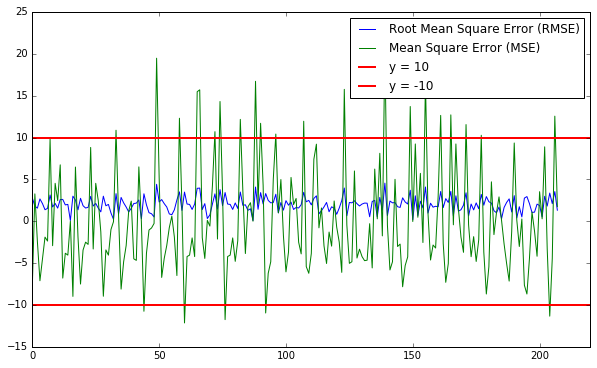

In [74]:
plt.figure(figsize=(10,6))
#plt.plot(predict, label = 'predict')
#plt.plot(df_total["future_real"])
plt.plot(np.sqrt(abs(lm.resid)), label = "Root Mean Square Error (RMSE)")
plt.plot(lm.resid, label = "Mean Square Error (MSE)")
plt.xlim(0,220)
plt.axhline(10, c = 'r', linewidth= 2, label = "y = 10")
plt.axhline(-10, c = 'r', linewidth= 2, label = "y = -10")
plt.legend()

### Linear Regression for 30 mins lag

In [75]:
lm_30 = smf.ols(formula='future_real_travel_time ~ mean_travel_time + current_travel_time', data = df_half).fit()
predict_30 = lm_30.predict(df_half)

In [76]:
rmse_60 = np.sqrt(np.square(lm.resid)/11)
rmse_30 = np.sqrt(np.square(lm_30.resid)/11)

/Users/lexu/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  if __name__ == '__main__':


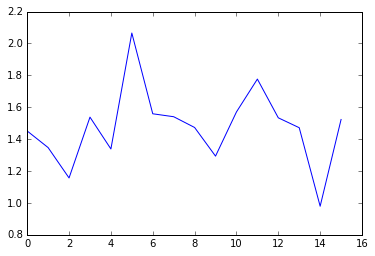

In [77]:
plt.plot((rmse_60.reshape(16,13).mean(axis = 1)))



## Plot MSE, RMSE for both 30 mins and 60 mins lag

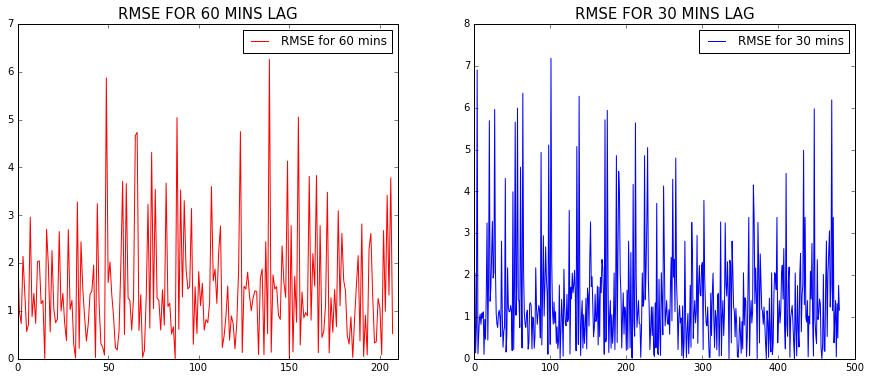

In [78]:
f, ax = plt.subplots(1,2, figsize=(15,6))

plt.subplot(1,2,1)
#plt.plot(np.square(lm.resid), label = "MSE for 60 mins", c = "b")
plt.plot(rmse_60, label = "RMSE for 60 mins", c = "r")
plt.title("RMSE FOR 60 MINS LAG", fontsize= 15)
plt.xlim(0,210)
plt.legend()

plt.subplot(1,2,2)
#plt.plot(np.square(lm_30.resid), label = "MSE for 30 mins")
plt.plot(rmse_30, label = "RMSE for 30 mins",c = 'b')
plt.title("RMSE FOR 30 MINS LAG",fontsize= 15)

plt.xlim(0,500)
#plt.axhline(10, c = 'r', linewidth= 2, label = "y = 10")
#plt.axhline(-10, c = 'r', linewidth= 2, label = "y = -10")
plt.legend()

## 30 mins lag has more fluctuation than 60 mins lag

## Guassian Process

## GP Model FOR 60 MINS LAG

In [81]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel,WhiteKernel

-1.48160321756e+13
RBF(length_scale=1)


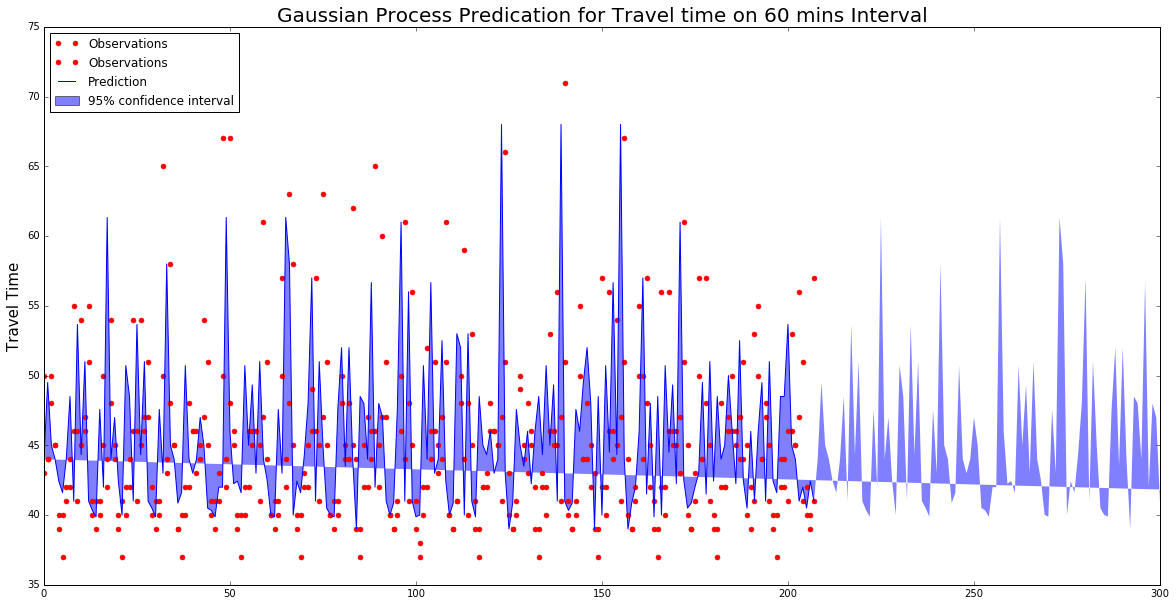

In [82]:
x = np.atleast_2d(df_total.current.values).T

X = df_total.iloc[:,(0,2)]
# Instanciate a Gaussian Process model
kernel = RBF(1, (1,1))
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=1,random_state=0)

# Fit to data using Maximum Likelihood Estimation of the parameters
gp.fit(X, df_total.future_real)

#Make the prediction on the meshed x-axis (ask for MSE as well)
y_pred, sigma = gp.predict(X, return_std=True)

# # Plot the function, the prediction and the 95% confidence interval based on
# # the MSE
fig = plt.figure(figsize=(20,10))
dd = X
plt.plot(range(len(dd)), np.asarray(dd), 'r.', markersize=10, label=u'Observations')
plt.plot(range(len(dd)), y_pred, 'b-', label=u'Prediction')

plt.fill(#np.concatenate([range(len(y_pred+100)), range(len(y_pred+100))[::-1]]),
    np.concatenate([y_pred - 1.9600 * sigma, (y_pred + 1.9600 * sigma)]),
          alpha=.5, fc='b', ec='None', label='95% confidence interval')



#plt.fill_between(range(len(df_total.current)), y_pred - 2*sigma, y_pred + 2*sigma,
#                 alpha=1, color='k')

#plt.xlabel('Current Spea')
plt.ylabel('Travel Time', fontsize = 15)

plt.title("Gaussian Process Predication for Travel time on 60 mins Interval", fontsize = 20)
plt.xlim(0, 300)
plt.legend(loc='upper left')

print gp.log_marginal_likelihood_value_
print gp.kernel_

## GP Model FOR 60 MINS LAG

In [86]:
df_half

,current_travel_time,future_real_travel_time,mean_travel_time
0,44,45,53
1,45,55,51
2,55,43,44
3,43,50,49
4,50,71,52
5,71,43,46
6,43,45,48
7,45,46,53
8,46,40,42
9,40,41,41


-4.27955370473e+13
RBF(length_scale=1)


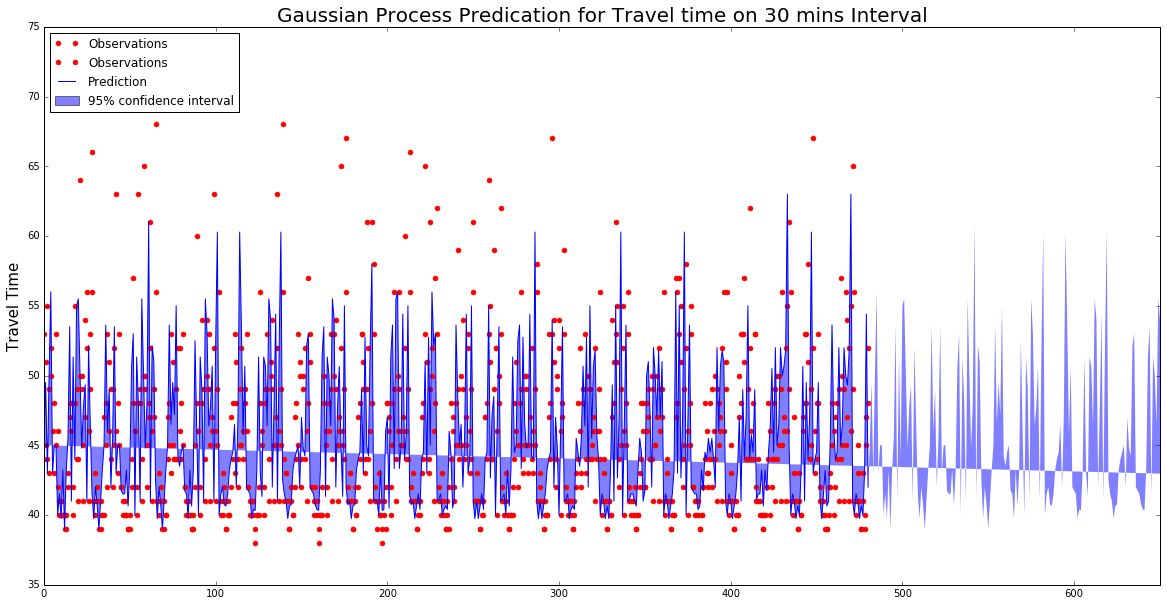

In [87]:
x = np.atleast_2d(df_half.current_travel_time.values).T

X = df_half.iloc[:,(0,2)]
# Instanciate a Gaussian Process model
kernel = RBF(0.1, (1,1))
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=1,random_state=0)

# Fit to data using Maximum Likelihood Estimation of the parameters
gp.fit(X, df_half.future_real_travel_time)

#Make the prediction on the meshed x-axis (ask for MSE as well)
y_pred, sigma = gp.predict(X, return_std=True)

# # Plot the function, the prediction and the 95% confidence interval based on
# # the MSE
fig = plt.figure(figsize=(20,10))
dd = X
plt.plot(range(len(dd)), np.asarray(dd), 'r.', markersize=10, label=u'Observations')
plt.plot(range(len(dd)), y_pred, 'b-', label=u'Prediction')

plt.fill(
    np.concatenate([y_pred - 1.9600 * sigma, (y_pred + 1.9600 * sigma)]),
alpha=.5, fc='b', ec='None', label='95% confidence interval')



#plt.xlabel('Current Spea')
plt.ylabel('Travel Time', fontsize = 15)
plt.title("Gaussian Process Predication for Travel time on 30 mins Interval", fontsize = 20)
plt.xlim(0, 650)
plt.legend(loc='upper left')

print gp.log_marginal_likelihood_value_
print gp.kernel_

## Use first 5 hours to predict next hours for the time lag 60 mins

In [97]:
dt_new =df_new.T
dt_new.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
2013_05_01,43.156650,44.807245,50.347364,45.397713,40.862909,40.533706,41.304845,44.453783,55.638989,41.684051,54.635268,46.990661,55.472574,41.540352,41.866541,40.275313,46.269442
2013_05_02,45.512000,42.696013,54.505744,44.679379,40.610946,41.077551,40.966243,44.697952,54.655590,41.161592,54.869085,46.032076,47.581151,42.523896,41.403897,40.232722,45.596702
2013_05_03,65.269396,43.550910,58.408598,45.349346,39.953496,40.875992,40.512921,48.825379,46.107149,43.385307,44.969886,54.597418,45.630520,41.365744,41.657827,43.386906,44.882106
2013_05_04,67.645150,42.917350,67.696617,46.791869,40.313894,40.433195,40.085220,46.861663,45.614442,46.175128,41.257100,61.880837,44.424134,40.110981,41.837836,40.945406,44.526722
2013_05_05,57.007588,42.962702,63.336604,58.864976,40.685367,40.055873,43.417074,45.268097,49.312153,57.820390,41.818898,63.609042,45.200954,40.132548,41.552462,40.252362,44.409714


In [98]:
c_name = []
for i in range(17):
    c_name.append("hour_{}".format(i+5))
    
dt_new.columns = c_name
dt_new

,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21
2013_05_01,43.156650,44.807245,50.347364,45.397713,40.862909,40.533706,41.304845,44.453783,55.638989,41.684051,54.635268,46.990661,55.472574,41.540352,41.866541,40.275313,46.269442
2013_05_02,45.512000,42.696013,54.505744,44.679379,40.610946,41.077551,40.966243,44.697952,54.655590,41.161592,54.869085,46.032076,47.581151,42.523896,41.403897,40.232722,45.596702
2013_05_03,65.269396,43.550910,58.408598,45.349346,39.953496,40.875992,40.512921,48.825379,46.107149,43.385307,44.969886,54.597418,45.630520,41.365744,41.657827,43.386906,44.882106
2013_05_04,67.645150,42.917350,67.696617,46.791869,40.313894,40.433195,40.085220,46.861663,45.614442,46.175128,41.257100,61.880837,44.424134,40.110981,41.837836,40.945406,44.526722
2013_05_05,57.007588,42.962702,63.336604,58.864976,40.685367,40.055873,43.417074,45.268097,49.312153,57.820390,41.818898,63.609042,45.200954,40.132548,41.552462,40.252362,44.409714
2013_05_06,48.864122,45.478071,44.870173,62.596243,44.924015,39.167695,45.288356,47.662243,44.893873,65.129668,42.321907,60.593176,47.402028,40.665944,39.674746,40.338638,51.477164
2013_05_07,46.397890,61.441588,41.595100,56.939570,41.630701,38.843125,40.173526,52.704176,44.672899,51.336893,43.679730,44.927103,61.632949,40.789834,39.780618,41.477180,53.774532
2013_05_08,48.630818,59.546924,40.908345,53.170817,41.858036,39.140521,42.309302,43.169126,48.193375,46.879420,45.295483,41.540221,66.666808,43.734422,39.585646,40.815599,52.320623
2013_05_09,49.578583,45.832611,43.355330,46.137773,42.213582,39.178109,43.361114,40.477397,53.729880,45.186640,56.268422,41.994658,71.940606,41.955850,39.203680,40.494310,51.926168
2013_05_10,55.695856,44.896998,44.564594,42.456396,43.834958,39.582395,57.754885,40.809428,56.818066,44.874571,54.205606,41.610906,67.286064,44.671298,39.469569,42.050474,42.627090


## Use Previous 5 hours to predict the next hour

In [99]:
mean_list = dt_new.mean(axis =1)
dt_new['mean'] = mean_list

In [105]:
lm_list = []
for i in range(5,17):

    y_pred = (dt_new.iloc[:,i]) # assign the hour to a variable
    # linear regression :
    lm_test = smf.ols(
        formula= 'hour_%s ~ hour_%s + hour_%s + hour_%s + hour_%s + hour_%s + mean'%(i+5, i, i+1, i+2, i+3, i+4),\
        data = dt_new).fit()
    lm_list.append(np.sqrt(np.square(lm_test.resid)))
    #rmse_60 = np.sqrt(np.square(lm.resid)/11)
    #print dt_new.iloc[:,i] 

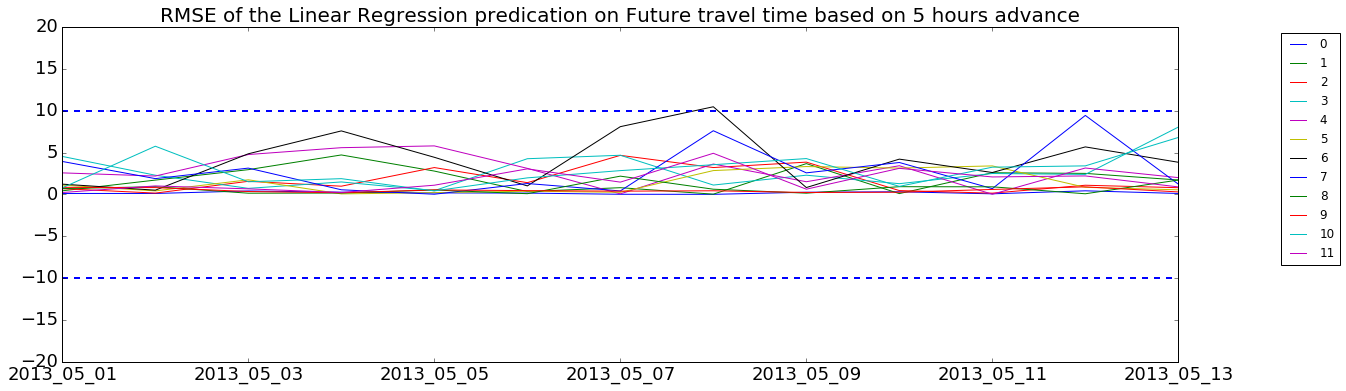

In [106]:
temm = pd.DataFrame(np.array(lm_list), columns=lis_name)
temm.T.plot(figsize=(20,6))
plt.legend(bbox_to_anchor=(1.15, 1))
plt.axhline(10, c = 'b', linestyle="--", linewidth= 2)
plt.axhline(-10, c = 'b',linestyle="--", linewidth= 2)
plt.tick_params(labelsize = 18)
plt.ylim(-20,20)
plt.title("RMSE of the Linear Regression predication on Future travel time based on 5 hours advance", fontsize = 20)

## Comment: the prediction error improved when we think of 5 hours range.

------

## Use Previous 2 hours to predict the next hour

In [107]:
dt_half_new = df_half_new.T

In [108]:
c_name_30 = []
for i in range(38):
    c_name_30.append("hour_{}".format(i))
    
dt_half_new.columns = c_name_30
dt_half_new

,hour_0,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,...,hour_28,hour_29,hour_30,hour_31,hour_32,hour_33,hour_34,hour_35,hour_36,hour_37
2013_05_01,44.546209,45.190798,55.575441,43.054377,50.560645,71.787355,43.355330,45.090385,46.137773,40.929519,...,66.666808,41.119419,40.665944,42.939492,41.387130,39.451424,40.945406,40.554149,45.596702,56.423464
2013_05_02,42.815954,46.397890,49.335334,42.962702,45.683009,63.336604,43.884161,45.349346,42.739153,40.862909,...,68.961984,41.223551,40.728390,42.510599,41.163770,39.612699,40.212960,44.535637,45.220673,51.926168
2013_05_03,43.156650,45.304790,44.807245,44.095653,44.590962,52.407238,44.564594,45.042400,42.456396,40.659962,...,71.940606,40.524676,40.789834,42.428688,39.854278,40.326607,40.252362,42.989826,44.882106,46.202644
2013_05_04,43.706196,48.630818,42.716030,45.478071,45.541980,44.870173,49.351645,46.791869,42.184056,40.610946,...,68.637539,44.088414,43.847054,41.866541,39.884239,42.984208,40.023736,42.050474,44.537467,42.627090
2013_05_05,45.512000,50.351373,42.696013,50.849791,44.278988,41.513732,57.567077,51.114834,42.053038,40.439743,...,67.286064,42.486763,43.734422,41.576782,39.674746,42.189653,40.338638,42.932875,44.526722,40.939253
2013_05_06,53.836776,49.578583,43.078134,61.441588,44.881044,41.595100,61.870605,58.864976,41.928125,39.953496,...,66.332730,42.523896,41.934246,41.403897,39.756279,40.860873,41.167990,43.711353,44.796736,40.920811
2013_05_07,65.269396,51.264487,43.550910,61.499393,50.347364,41.109577,57.401215,62.838231,41.989365,40.346483,...,61.463045,41.416447,41.955850,41.349085,39.780618,40.059558,41.477180,47.673883,44.409714,41.021498
2013_05_08,64.011434,55.695856,44.073630,59.546924,52.943901,40.908345,50.064966,62.596243,41.697325,40.313894,...,58.390040,41.365744,42.453298,41.657827,39.641166,40.275313,40.941389,53.578230,44.424931,41.332842
2013_05_09,67.645150,54.200673,42.917350,50.880511,54.505744,40.847660,47.611783,59.824168,41.834701,40.488886,...,44.884870,40.762908,44.671298,41.774739,39.585646,41.661789,40.815599,54.929225,51.477164,41.399072
2013_05_10,61.348301,55.797177,42.806692,45.832611,55.542931,40.758447,45.823831,56.939570,41.571764,40.685367,...,41.929939,40.110981,44.239856,41.837836,39.347416,40.232722,40.707062,57.850140,56.036014,41.031687


In [109]:
mean_list_30 = dt_half_new.mean(axis =1)
dt_half_new['mean'] = mean_list_30

## Linear Regression for previous 2 hours, namely 4 half-an-hours

In [110]:
lm_list_30 = []

for i in range(4,38):
    lm_test = smf.ols(formula= 'hour_%s ~ hour_%s + hour_%s + hour_%s + hour_%s + mean'%(i, i-1, i-2, i-3, i-4),\
        data = dt_half_new).fit()
    lm_list_30.append(np.sqrt(np.square(lm_test.resid)/5))
    
    #print dt_new.iloc[:,i] 

In [111]:
lis_name

['2013_05_01',
 '2013_05_02',
 '2013_05_03',
 '2013_05_04',
 '2013_05_05',
 '2013_05_06',
 '2013_05_07',
 '2013_05_08',
 '2013_05_09',
 '2013_05_10',
 '2013_05_11',
 '2013_05_12',
 '2013_05_13']

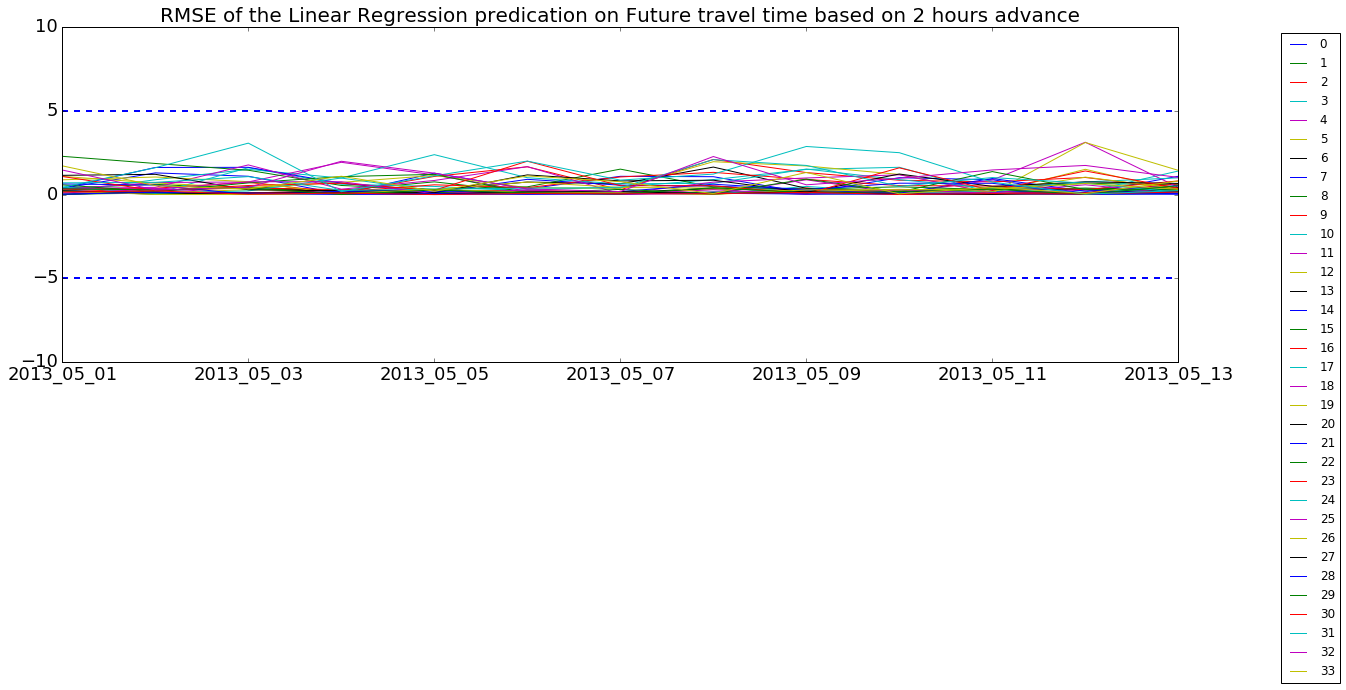

In [112]:
temm_30 = pd.DataFrame(np.array(lm_list_30), columns=lis_name)

temm_30.T.plot(figsize=(20,6))

plt.legend(bbox_to_anchor=(1.15, 1))
plt.axhline(5, c = 'b', linestyle="--", linewidth= 2)
plt.axhline(-5, c = 'b',linestyle="--", linewidth= 2)
plt.tick_params(labelsize = 18)
plt.ylim(-10,10)
plt.title("RMSE of the Linear Regression predication on Future travel time based on 2 hours advance", fontsize = 20)

## Comment: the prediction error improved when we think of 2 hours range instead of 5 hour range.